In [178]:
import matplotlib.pylab as plt 
import cv2
import numpy as np

In [179]:
image=cv2.imread("road.jpg")
image1=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

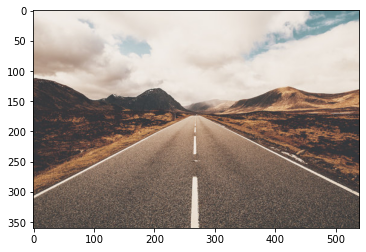

In [180]:

plt.imshow(image1)

In [181]:
def roi(img,vertex):
    mask=np.zeros_like(img)
    match_color=255,
    cv2.fillPoly(mask,vertex,match_color)
    masked_image=cv2.bitwise_and(img,mask)
    return masked_image


def draw_line(img,lines):
    img=np.copy(img)
    line_image=np.zeros((img.shape[0],img.shape[1],3),dtype=np.uint8)
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(line_image,(x1,y1),(x2,y2),(0,255,0),thickness=3)
            plt.imshow(line_image)
    new_img=cv2.addWeighted(img,0.8,line_image,1,0.0) 
    return new_img
    

In [182]:
h=image1.shape[0]
b=image1.shape[1]

In [183]:
roi_vertex=[(b,290),(275,170),(0,290)]

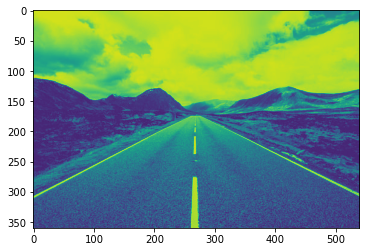

In [184]:
gray_img=cv2.cvtColor(image1,cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img)

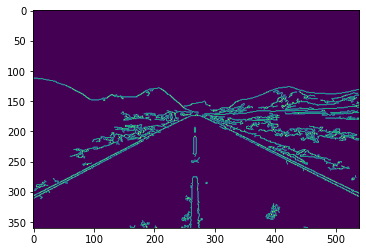

In [185]:
canny_image=cv2.Canny(gray_img,100,400)
plt.imshow(canny_image)

In [186]:
cropped_img=roi(canny_image,np.array([roi_vertex],np.int32))

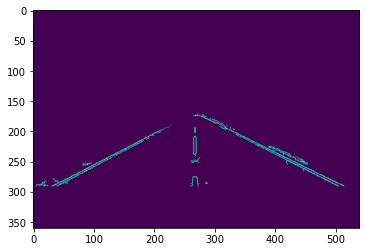

In [187]:
plt.imshow(cropped_img)

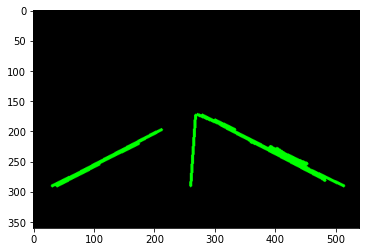

In [188]:
lines=cv2.HoughLinesP(cropped_img,rho=6,theta=np.pi/180,threshold=100,lines=np.array([]),minLineLength=10,maxLineGap=40)
image_with_line=draw_line(image,lines)

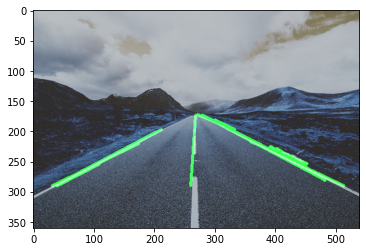

In [189]:
plt.imshow(image_with_line)